In [34]:
import numpy as np
import cv2
from PIL import Image
import math
import matplotlib.pyplot as plt

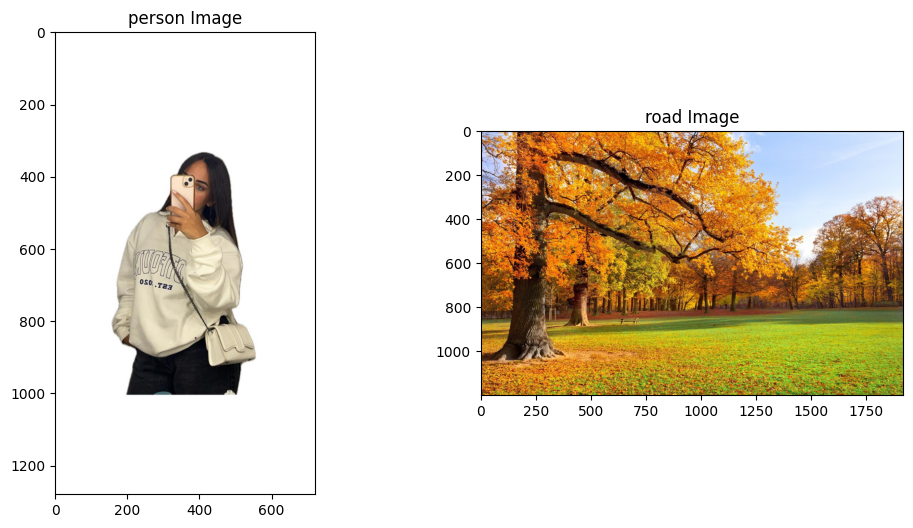

In [35]:
person = cv2.imread("/content/8abfb517-fd4f-477b-8472-8ed3a81bad60.JPG")
person=cv2.cvtColor(person,cv2.COLOR_BGR2RGB)
road = cv2.imread("/content/wallpaperflare.com_wallpaper.jpg")
road=cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Display the gray image
axs[0].imshow(person, cmap='gray')
axs[0].set_title('person Image')
# Display the gray image
axs[1].imshow(road, cmap='gray')
axs[1].set_title('road Image')
plt.show()

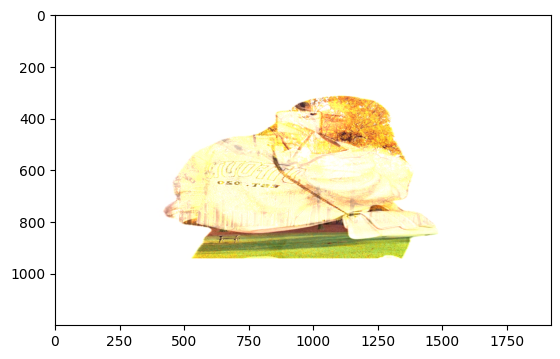

In [36]:
person = cv2.resize(person, (road.shape[1], road.shape[0])) # Blend the images
result = cv2.add(person,road)
# Display the result
plt.imshow(result)

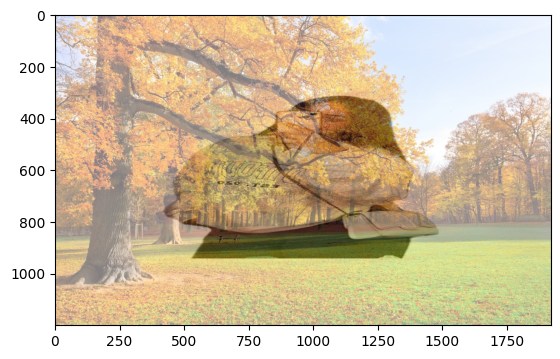

In [37]:
# Blend the images
result2 = cv2.addWeighted(person, 0.5, road, 0.5, 0)
# Display the result
plt.imshow(result2) # Convert BGR to RGB for Matplotlib plt.show()

In [38]:
np.max(result)

255

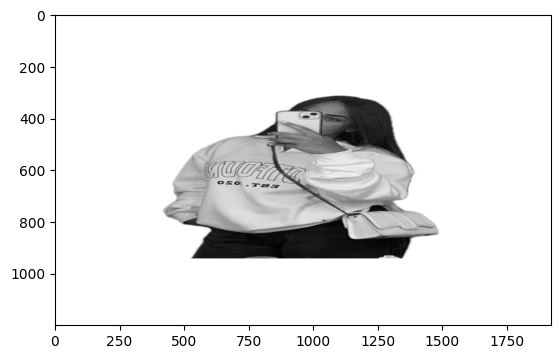

In [39]:
person=cv2.cvtColor(person,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(person,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')

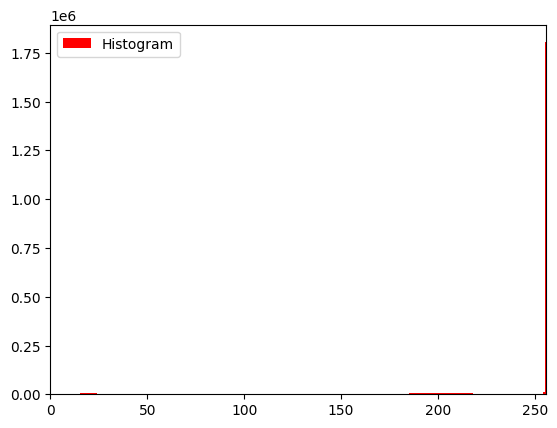

In [40]:
# Plot the histogram
plt.hist(gray_img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['Histogram'], loc='upper left')
plt.show()

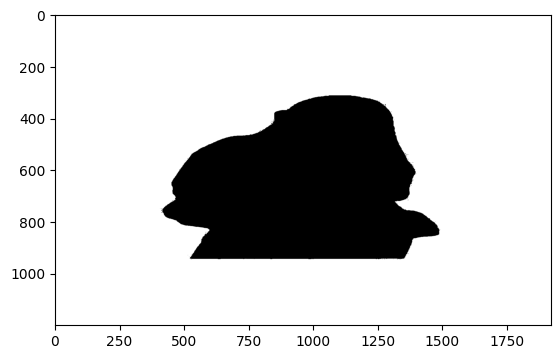

In [41]:
threshold_value = 250
# Apply binary thresholding
_, mask = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')

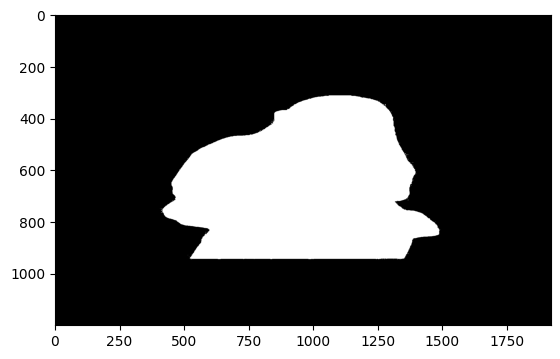

In [42]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')

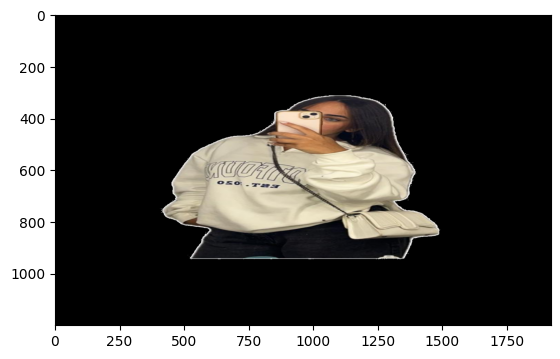

In [43]:
person = cv2.bitwise_and(person, person, mask=mask_inv)
person=cv2.cvtColor(person,cv2.COLOR_BGR2RGB)
plt.imshow(person)

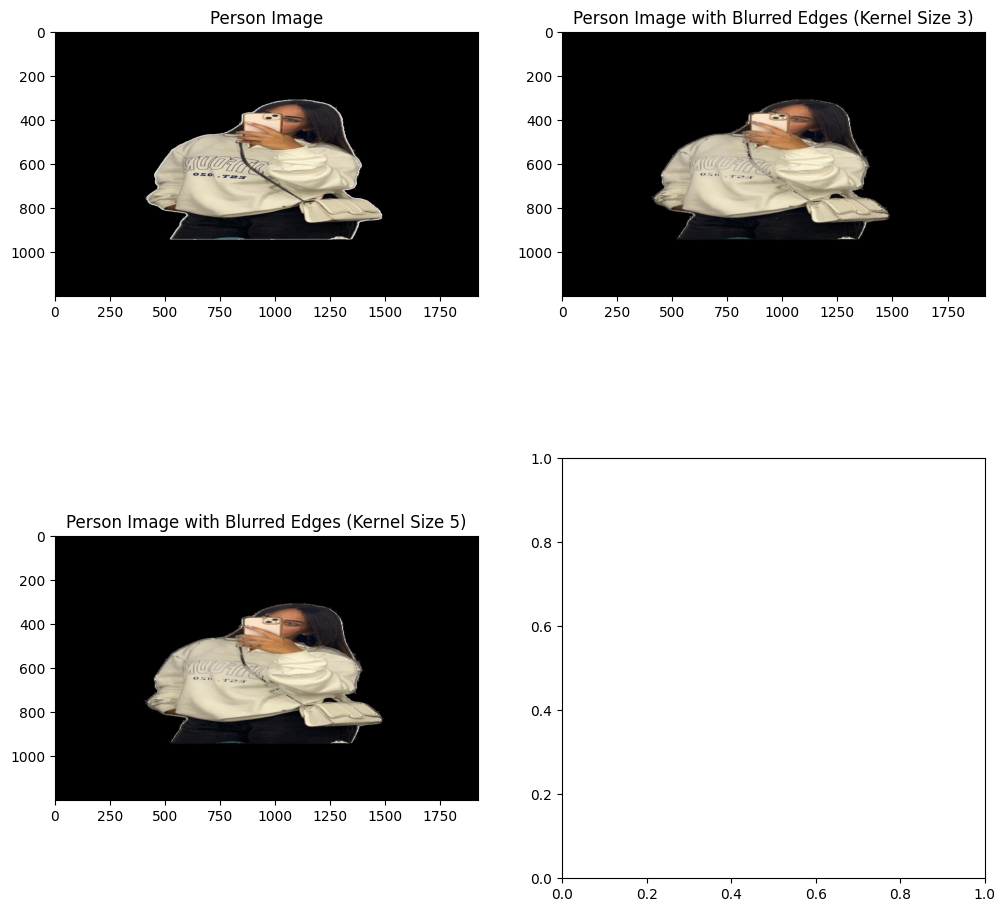

In [47]:
# Convert the image to grayscale
gray_person = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to the grayscale image with kernel size 3
blurred_person_3 = cv2.GaussianBlur(gray_person, (3, 3), 0)

# Apply Gaussian blur to the grayscale image with kernel size 5
blurred_person_5 = cv2.GaussianBlur(gray_person, (5, 5), 0)

# Use Canny edge detection method to detect the edges
edges_3 = cv2.Canny(blurred_person_3, threshold1=100, threshold2=100)
edges_5 = cv2.Canny(blurred_person_5, threshold1=100, threshold2=100)

# Dilate the edges with kernel size 3
dilated_edges_3 = cv2.dilate(edges_3, None)
dilated_edges_5 = cv2.dilate(edges_5, None)

# Create a mask from the dilated edges
mask1_3 = dilated_edges_3 != 0
mask1_5 = dilated_edges_5 != 0

# Blur the original image
blurred_person_rgb = cv2.GaussianBlur(person, (255, 255), 0)

# Use the mask to replace the edges in the original image with the corresponding parts from the blurred image
person_with_blurred_edges_3 = np.where(mask1_3[:, :, None], blurred_person_rgb, person)
person_with_blurred_edges_5 = np.where(mask1_5[:, :, None], blurred_person_rgb, person)

# Display the original image and the result with kernel size 3 and 5
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].imshow(person)
axs[0, 0].set_title('Person Image')
axs[0, 1].imshow(person_with_blurred_edges_3)
axs[0, 1].set_title('Person Image with Blurred Edges (Kernel Size 3)')
axs[1, 0].imshow(person_with_blurred_edges_5)
axs[1, 0].set_title('Person Image with Blurred Edges (Kernel Size 5)')
plt.show()

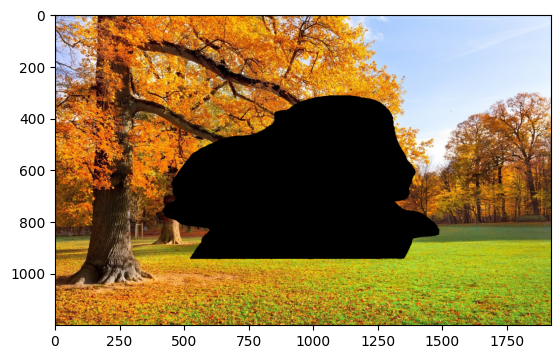

In [48]:
road = cv2.bitwise_and(road, road, mask=mask)
plt.imshow(road)

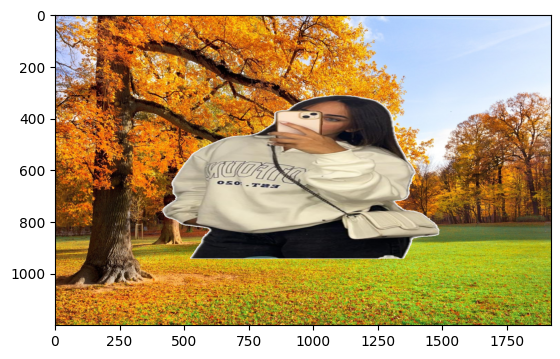

In [49]:
result = cv2.add(road, person)
plt.imshow(result)